# Glossaire

Entropie croisée

Marcel Turcotte (École de science informatique et de génie électrique,
Université d’Ottawa)  
2025-08-28

L’entropie croisée (*cross-entropy*) mesure la différence entre une
distribution de probabilités prédites et la distribution réelle,
généralement représentée par des étiquettes encodées en « *one-hot* ».
Elle quantifie la pénalité ou l’erreur de prédiction, couramment
utilisée comme fonction de perte dans les tâches de classification, avec
des valeurs plus faibles indiquant une meilleure performance du modèle.

L’équation de l’entropie croisée $H(p, q)$ est :

$$ 
H(p, q) = -\sum_{k} p_k \log(q_k) 
$$

où :

-   $p_k$ est la distribution de probabilités réelle (typiquement des
    étiquettes encodées en « *one-hot* »),
-   $q_k$ est la distribution de probabilités prédites,
-   la somme est effectuée sur toutes les classes $k$.

Dans la classification binaire, cela se simplifie en :

$$ 
H(y, \hat{y}) = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})] 
$$

où :

-   $y$ est l’étiquette réelle (soit 0 soit 1),
-   $\hat{y}$ est la probabilité prédite de la classe positive.

Lorsque $y$, l’étiquette réelle, est encodée en « *one-hot* » pour la
classification multiclasses, elle représente la classe sous forme de
vecteur où l’élément correspondant à la classe correcte est 1, et tous
les autres éléments sont 0. Cet encodage permet à la perte d’entropie
croisée de se concentrer uniquement sur la probabilité prédite pour la
classe correcte, pénalisant le modèle en fonction de l’écart de la
probabilité prédite à 1 pour la classe correcte.

Dans les réseaux de neurones, les valeurs de $\hat{y}_k$ sont
généralement obtenues en appliquant la fonction softmax aux sorties de
la dernière couche.

Le programme Python ci-dessous montre comment la perte d’entropie
croisée pour un exemple varie avec les changements de la probabilité
prédite, représentée par $-\log(\hat{y}_k)$, lorsque celle-ci s’écarte
de 1 pour l’étiquette de classe réelle ($y_k$). Lorsque $\hat{y}_k$
approche 1, la perte pour un seul exemple approche 0, indiquant aucune
pénalité. Inversement, lorsque $\hat{y}_k$ approche 0, la perte tend
vers l’infini positif, imposant une pénalité substantielle pour
l’attribution d’une faible probabilité à la classe correcte. Cette
relation logarithmique garantit que la fonction de perte pénalise
fortement les prédictions incorrectes, notamment lorsque la probabilité
prédite pour la classe correcte est proche de zéro.

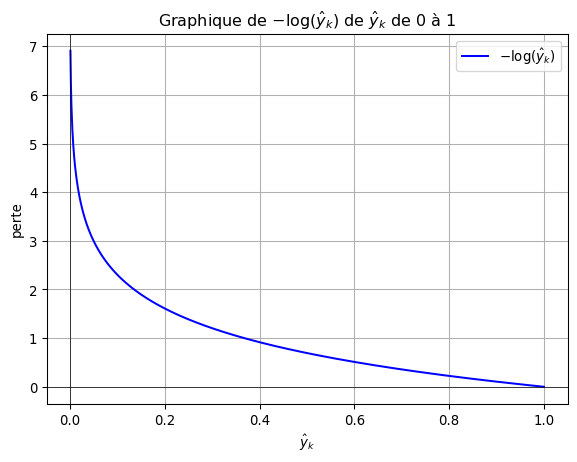

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Générer un tableau de valeurs p de juste au-dessus de 0 à 1
p_values = np.linspace(0.001, 1, 1000)

# Calculer le logarithme naturel de chaque valeur p
ln_p_values = - np.log(p_values)

# Tracer le graphique
plt.plot(p_values, ln_p_values, label=r'$-\log(\hat{y}_k)$', color='b')

# Ajouter des étiquettes et un titre
plt.xlabel(r'$\hat{y}_k$')
plt.ylabel(r'perte')
plt.title(r'Graphique de $-\log(\hat{y}_k)$ de $\hat{y}_k$ de 0 à 1')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5) # Ajouter une ligne horizontale à y=0
plt.axvline(0, color='black', lw=0.5) # Ajouter une ligne verticale à x=0

# Afficher le graphique
plt.legend()
plt.show()

Considérons un problème de classification multiclasses avec trois
classes $(C_1, C_2, C_3)$. Supposons que la classe réelle de l’exemple
donné soit $C_2$, et que le modèle produise les probabilités prédites
suivantes :

$$ 
\hat{y} = [0.2, 0.7, 0.1] 
$$

L’étiquette réelle encodée en « *one-hot* » ${y}$ pour $C_2$ est :

$$ 
{y} = [0, 1, 0] 
$$

En utilisant la formule de l’entropie croisée :

$$ 
H({y}, \hat{y}) = -\sum_{k} y_k \log(\hat{y}_k) 
$$

En substituant les valeurs :

$$ 
H({y}, \hat{y}) = -[0 \cdot \log(0.2) + 1 \cdot \log(0.7) + 0 \cdot \log(0.1)] 
$$

Puisque seul le terme correspondant à la classe réelle (deuxième classe)
est non nul, le calcul se simplifie en :

$$ 
H({y}, \hat{y}) = -\log(0.7) 
$$

Ce qui donne :

$$ 
H({y}, \hat{y}) \approx -(-0.357) = 0.357 
$$

Ainsi, la perte d’entropie croisée pour cet exemple est d’environ 0.357,
indiquant la pénalité pour l’écart du modèle par rapport à la
probabilité de la classe correcte.

Lors du calcul de la perte moyenne d’entropie croisée sur un ensemble de
données avec plusieurs exemples, la fonction de perte est sommée sur
tous les exemples puis divisée par le nombre d’exemples pour obtenir la
perte moyenne. L’équation pour la perte moyenne d’entropie croisée est :

$$ 
L = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k}) 
$$

où :

-   $N$ est le nombre total d’exemples dans l’ensemble de données,
-   $K$ est le nombre de classes,
-   $y_{i,k}$ est l’indicateur binaire réel (0 ou 1) pour savoir si le
    $i$-ème exemple appartient à la classe $k$,
-   $\hat{y}_{i,k}$ est la probabilité prédite que le $i$-ème exemple
    appartienne à la classe $k$.

Cette formulation calcule la perte moyenne sur tous les exemples,
fournissant une valeur scalaire unique qui représente la performance du
modèle sur l’ensemble du jeu de données.